# COMPANY DATASET
Using the above dataset to build a Model using Decision Tree and Random Forest Classifier to predict whether the sales are low or high.

## BUSINESS OBJECTIVE
* Maximize Accurate prediction
* Minimize Errors

## CONSTRAINTS
* Incorrect entry


## DATA DICTIONARY

| **slno** | **Name of Feature** | **Description**                                                                                                          | **Type** | **Relevance** |
|:--------:|:-------------------|:--------------------------------------------------------------------------------------------------------------------------|:--------:|:-------------:|
| 1        | Sales               | Unit sales (in thousands) at each location                                                                               | Ratio    | Relevant      |
| 2        | CompPrice           | Price charged by competitor at each location                                                                             | Ratio    | Relevant      |
| 3        | Income              | Community income level (in thousands of dollars)                                                                         | Ratio    | Relevant      |
| 4        | Advertising         | Local advertising budget for company at each location (in thousands of dollars)                                          | Ratio    | Relevant      |
| 5        | Population          | Population size in region (in thousands)                                                                                 | Ratio    | Relevant      |
| 6        | Price               | Price company charges for car seats at each site                                                                         | Ratio    | Relevant      |
| 7        | ShelveLoc           | A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site | Ordinal  | Relevant      |
| 8        | Age                 | Average age of the local population                                                                                      | Ratio    | Relevant      |
| 9        | Education           | Education level at each location                                                                                         | Ordinal  | Relevant      |
| 10       | Urban               | A factor with levels No and Yes to indicate whether the store is in an urban or rural location                           | Binary   | Relevant      |
| 11       | US                  | A factor with levels No and Yes to indicate whether the store is in the US or not                                        | Binary   | Relevant      |

Importing the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from termcolor import colored
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

Loading the dataset using the pandas library and confirming the dataset has been loaded properly using the 'head' function

In [2]:
df0 = pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass16\Company_Data.csv")
df=df0.copy()
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### EXPLORATORY DATA ANALYSIS & FEATURE ENGINEERING

The below three lines give a general idea about the dataset like the shape, type and non null values.

In [3]:
df.shape

(400, 11)

In [4]:
df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


The describe function gives the count, min, max, mean, standard deviation and quantile values of the dataset.

In [6]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


Checking the Number of Duplicates in the Dataset.

In [7]:
duplicate_values=df.duplicated(subset=None,keep='first').sum()
print(colored(' Number of Duplicate values: ','blue',attrs=['bold']),duplicate_values)

 Number of Duplicate values:  0


Checking the Number and Percentage of Missing Values in the Dataset.

In [8]:
missing=df.isna().sum().sort_values(ascending=False)
print(colored("Number of Missing Values\n\n",'blue',attrs=['bold']),missing)

Number of Missing Values

 Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


In [9]:
print(colored('Number of Unique Values:\n\n','blue',attrs=['bold']),df.nunique())

Number of Unique Values:

 Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64


### First Moment Business Decision or Measures of Central Tendency.
* It gives the mean, median and mode values of the dataset.
* Mean is the average of the data and it easily gets influenced by the outliers.
* Median is the middle most value of the dataset.
* Mode is the most repeated value of the dataset.
* If the mean, median & mode are same then the data has normal distribution otherwise the distribution is not normal.

In [10]:
df.mean()

C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Sales            7.496325
CompPrice      124.975000
Income          68.657500
Advertising      6.635000
Population     264.840000
Price          115.795000
Age             53.322500
Education       13.900000
dtype: float64

In [11]:
df.median()

C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Sales            7.49
CompPrice      125.00
Income          69.00
Advertising      5.00
Population     272.00
Price          117.00
Age             54.50
Education       14.00
dtype: float64

In [12]:
stats.mode(df)

C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\4235401754.py:1: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  stats.mode(df)
C:\Users\lenny\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\4235401754.py:1: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/r

ModeResult(mode=array([[7.8, 121, 69, 0, 276, 120, 'Medium', 62, 17, 'Yes', 'Yes']],
      dtype=object), count=array([[  4,  16,  11, 144,   4,  12, 219,  14,  49, 282, 258]]))

### Second Moment Business Decision or Measures of Dispersion
* It contains Variance, Standard Deviation & Range.
* It gives a general idea about the spread of data in the dataset.
* Variance is the average squared distance of each data point from the mean.
* Standard deviation is the root of the variance.
* Range is the difference between the max and min data point of the dataset.

In [13]:
df.var()

C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Sales              7.975626
CompPrice        235.147243
Income           783.218239
Advertising       44.227343
Population     21719.813935
Price            560.584436
Age              262.449618
Education          6.867168
dtype: float64

In [14]:
df.std()

C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Sales            2.824115
CompPrice       15.334512
Income          27.986037
Advertising      6.650364
Population     147.376436
Price           23.676664
Age             16.200297
Education        2.620528
dtype: float64

### THIRD MOMENT BUSINESS DECISION OR SKEWNESS
* Skewness gives the measure of asymmetry in a data.
* The types of skewness are as follows:
    * Negative skewness or left skewed.
    * Positive skewness or right skewed.
    * If skewness = 0 then it is normally distributed.

In [15]:
df.skew()

C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Sales          0.185560
CompPrice     -0.042755
Income         0.049444
Advertising    0.639586
Population    -0.051227
Price         -0.125286
Age           -0.077182
Education      0.044007
dtype: float64

### FOURTH MOMENT BUSINESS DECISION OR KURTOSIS
* Kurtosis is the peakedness of the distribution.
* Negative kurtosis implies a wider peak and thinner tails.
* Positive kurtosis implies a narrow peak and wider tails.

In [16]:
df.kurt()

C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Sales         -0.080877
CompPrice      0.041666
Income        -1.085289
Advertising   -0.545118
Population    -1.202318
Price          0.451885
Age           -1.134392
Education     -1.298332
dtype: float64

### GRAPHICAL REPRESENTATION

Plotting histograms of each variable.

C:\Users\lenny\AppData\Local\Temp\ipykernel_26304\522995607.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


<function matplotlib.pyplot.show(close=None, block=None)>

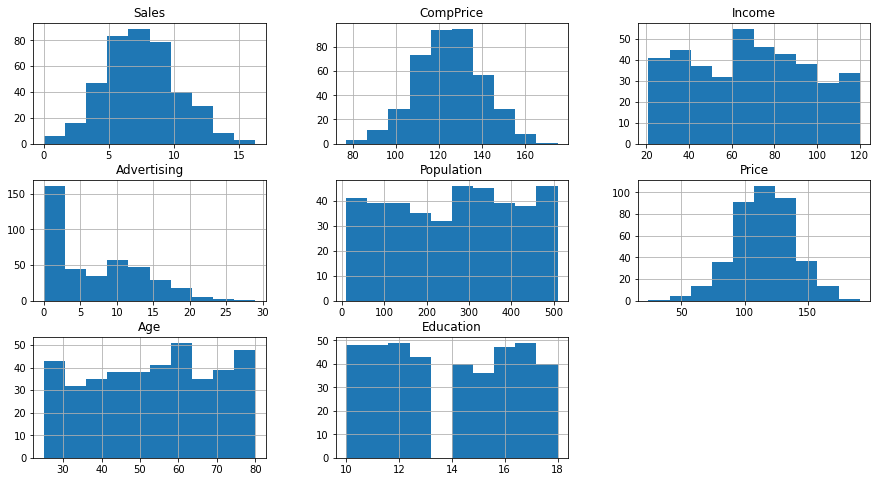

In [17]:
fig=plt.figure(figsize=(15,8))
ax=fig.gca()
df.hist(ax=ax)
plt.show

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


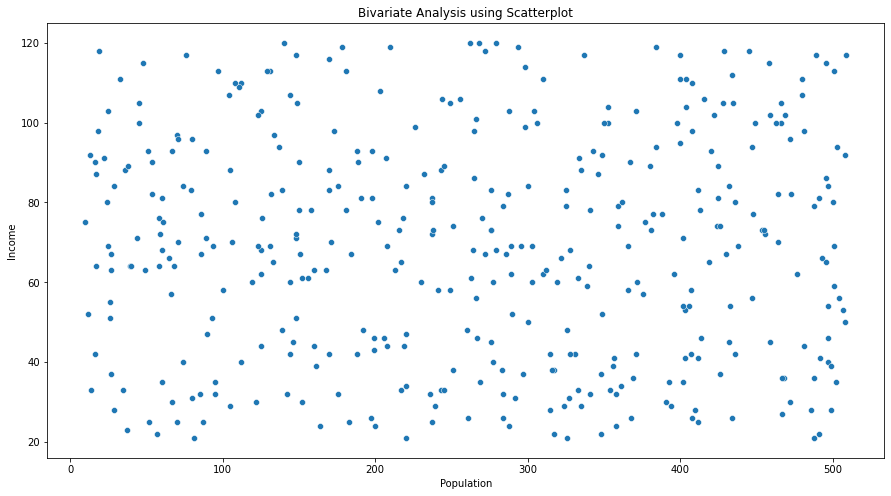

In [18]:
plt.figure(figsize=(15,8))
sns.scatterplot(df.Population,df['Income'])
plt.title("Bivariate Analysis using Scatterplot")
plt.show()

Plotting boxplots of each variable.

In [19]:
df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales'>

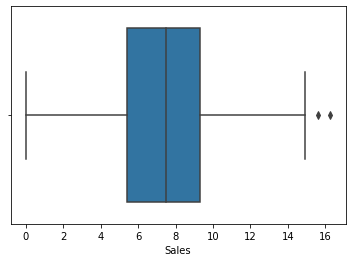

In [20]:
sns.boxplot(df["Sales"])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CompPrice'>

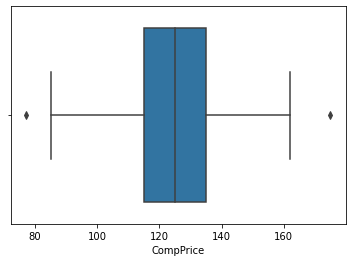

In [21]:
sns.boxplot(df['CompPrice'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

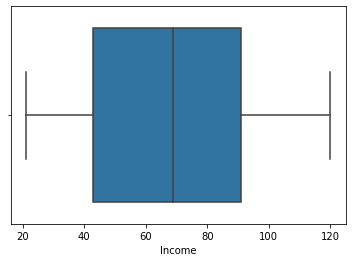

In [22]:
sns.boxplot(df.Income)

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Population'>

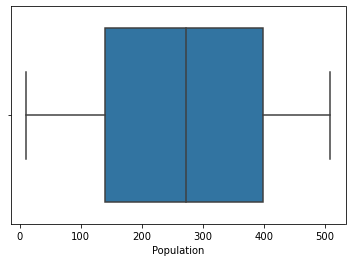

In [23]:
sns.boxplot(df['Population'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price'>

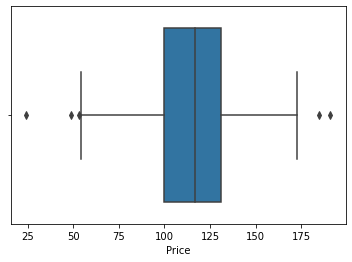

In [24]:
sns.boxplot(df['Price'])

C:\Users\lenny\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

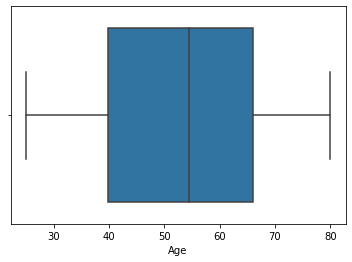

In [25]:
sns.boxplot(df['Age'])

In [26]:
#Defining a custom function to get the number of outliers present as doing the steps again would just add extra lines 
def outlier_func(i):
    x=i.quantile(0.25)-((i.quantile(0.75)-i.quantile(0.25))*1.5)
    y=i.quantile(0.75)+((i.quantile(0.75)-i.quantile(0.25))*1.5)
    outliers= np.where(i > y, True, np.where(i < x, True, False))
    return(outliers)

In [27]:
sum(outlier_func(df.Sales))

2

In [28]:
sum(outlier_func(df.CompPrice))

2

In [29]:
sum(outlier_func(df.Price))

5

In [30]:
winsor= Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['Sales'])

df.Sales= winsor.fit_transform(df[['Sales']])
sum(outlier_func(df.Sales))

0

In [31]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['CompPrice'])
df.CompPrice=winsor.fit_transform(df[['CompPrice']])
sum(outlier_func(df.CompPrice))

0

In [32]:
winsor=Winsorizer(capping_method='iqr',
                 tail='both',
                 fold=1.5,
                 variables=['Price'])
df.Price=winsor.fit_transform(df[['Price']])
sum(outlier_func(df.Price))

0

Replaced all the outliers using winsorization method. converting the sales variable column to integer from float type. 

In [33]:
df['Sales']=df['Sales'].astype(np.int64)

Discretizing the the target variable as continuous data cannot be used for classification. 

In [34]:
df['Sales'] = pd.cut(df['Sales'], bins=[min(df['Sales']),df['Sales'].mean(), max(df['Sales'])], labels=["Low","High"], include_lowest=True)
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138.0,73,11,276,120.0,Bad,42,17,Yes,Yes
1,High,111.0,48,16,260,83.0,Good,65,10,Yes,Yes
2,High,113.0,35,10,269,80.0,Medium,59,12,Yes,Yes
3,High,117.0,100,4,466,97.0,Medium,55,14,Yes,Yes
4,Low,141.0,64,3,340,128.0,Bad,38,13,Yes,No


Label encoding the categorical values of the independent variables. 

In [35]:
lb = LabelEncoder()
df["ShelveLoc"] = lb.fit_transform(df["ShelveLoc"])
df["Urban"] = lb.fit_transform(df["Urban"])
df["US"] = lb.fit_transform(df["US"])
df.dtypes

Sales          category
CompPrice       float64
Income            int64
Advertising       int64
Population        int64
Price           float64
ShelveLoc         int32
Age               int64
Education         int64
Urban             int32
US                int32
dtype: object

### MODEL BUILDING

Splitting the data in to dependent and independent variable.

In [36]:
X=df.drop(['Sales'],axis=1)
Y=df['Sales']

Splitting the X and Y data into train and test dataset using train_test_split function.

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Assigning the column names to cols.

In [38]:
cols=X.columns

Scaling the train and test data of the independent variables.

In [39]:
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [40]:
X_train=pd.DataFrame(X_train,columns=[cols])
X_train.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.675,-0.694301,0.083333,-0.853755,0.832,-2.0,-1.000000,1.00,0.0,-1.0
1,-1.225,-0.031088,0.583333,-0.363636,-0.416,0.0,-0.846154,0.50,-1.0,0.0
2,0.925,0.259067,0.000000,-0.853755,1.184,0.0,0.269231,1.00,0.0,0.0
3,-1.125,-0.735751,-0.416667,-0.233202,0.704,0.0,0.615385,1.00,-1.0,-1.0
4,-0.425,0.196891,-0.333333,-0.466403,-0.576,0.0,-0.346154,-0.75,0.0,0.0


In [41]:
X_test=pd.DataFrame(X_test,columns=[cols])
X_test.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0.000000,0.338983,0.363636,-0.118598,0.631579,-1.0,0.547170,-0.6,0.0,0.0
1,0.342857,0.881356,0.727273,-0.833783,-1.333333,-2.0,0.396226,1.0,0.0,0.0
2,-1.542857,1.084746,-0.454545,0.010782,-0.877193,0.0,0.547170,-0.6,-4.0,-1.0
3,0.285714,-0.994350,0.090909,0.521114,0.526316,-2.0,0.547170,0.6,0.0,0.0
4,-0.285714,-0.361582,1.363636,0.003594,-0.982456,-2.0,0.773585,1.0,0.0,0.0


Creating a Decision Tree classifier object with criterion as entropy

In [42]:
model = DT(criterion='entropy',random_state=0) 

Training the classifier on the train data. 

In [43]:
model.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', random_state=0)

Evaluating the test data

In [44]:
preds = model.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the test data.

In [45]:
accuracy_score(Y_test, preds)

0.725

In [46]:
pd.crosstab(Y_test, preds, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,High,Low
Actual,,
Low,12,22
High,36,10


Evaluating the train data

In [47]:
preds1=model.predict(X_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the train data. 

In [48]:
accuracy_score(Y_train,preds1)

1.0

In [49]:
pd.crosstab(Y_train,preds1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,High,Low
Actual,,
Low,0,150
High,170,0


### HYPERPARAMETER TUNING OF DECISION TREE CLASSIFIER

Loading the gridsearchcv function from sklearn library. 

In [50]:
from sklearn.model_selection import GridSearchCV

Declaring the parameters

In [51]:
param_grid = {'min_samples_leaf': [1, 5, 10, 20],
              'max_depth': [2, 4, 6, 8, 10],
              'max_features': ['sqrt']}

Creating a GridSearchCV object. 

In [52]:
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                                scoring = 'accuracy', n_jobs = -1, cv = 4, 
                                refit=True, return_train_score=True)

Training the GridSearchCV on train data. 

In [53]:
grid_search.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

The best parameters for the classifier.

In [54]:
best_parameters=grid_search.best_params_
best_parameters

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5}

Creating the estimator based on the best parameters. 

In [55]:
cv_dt_clf_grid = grid_search.best_estimator_

Evaluating the test data. 

In [56]:
accuracy_score(Y_test, cv_dt_clf_grid.predict(X_test))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.7375

In [57]:
pd.crosstab(Y_test, cv_dt_clf_grid.predict(X_test), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,High,Low
Actual,,
Low,14,20
High,39,7


Evaluating the train data. 

In [58]:
accuracy_score(Y_train, cv_dt_clf_grid.predict(X_train))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.878125

In [59]:
pd.crosstab(Y_train, cv_dt_clf_grid.predict(X_train), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,High,Low
Actual,,
Low,29,121
High,160,10


### RANDOM FOREST CLASSIFIER
Loading the Random forest classifier from sklearn library. 

In [60]:
from sklearn.ensemble import RandomForestClassifier

Creating the classifier object

In [61]:
rf_classifier=RandomForestClassifier(n_estimators=100)

Training the classifier on the train data. 

In [62]:
rf_classifier.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

Evaluating the test data

In [63]:
preds_rf =rf_classifier.predict(X_test)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Accuracy of the test data.

In [64]:
accuracy_score(Y_test,preds_rf)

0.825

In [65]:
pd.crosstab(Y_test,preds_rf, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,High,Low
Actual,,
Low,8,26
High,40,6


Evaluating the train data

In [66]:
preds_rf1=rf_classifier.predict(X_train)
accuracy_score(Y_train,preds_rf1)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [67]:
pd.crosstab(Y_train,preds_rf1, rownames = ['Actual'], colnames= ['Predictions'])

Predictions,High,Low
Actual,,
Low,0,150
High,170,0


### HYPERPARAMETER TUNING OF RANDOMFOREST CLASSIFIER
Creating the gridsearchcv object

In [68]:
grid_search_rf = GridSearchCV(estimator = rf_classifier, param_grid = param_grid, 
                                scoring = 'accuracy', n_jobs = -1, cv = 4, 
                                refit=True, return_train_score=True)

Training the gridsearch object on the train data. 

In [69]:
grid_search_rf.fit(X_train, Y_train)

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 5, 10, 20]},
             return_train_score=True, scoring='accuracy')

Considering the estimator based on the best parameters. 

In [70]:
cv_dt_clf_grid_rf = grid_search_rf.best_estimator_

Evaluating the test data

In [71]:
accuracy_score(Y_test, cv_dt_clf_grid_rf.predict(X_test))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.75

In [72]:
pd.crosstab(Y_test, cv_dt_clf_grid_rf.predict(X_test), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,High,Low
Actual,,
Low,14,20
High,40,6


Evaluating the train data. 

In [73]:
accuracy_score(Y_train, cv_dt_clf_grid_rf.predict(X_train))

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


0.975

In [74]:
pd.crosstab(Y_train, cv_dt_clf_grid_rf.predict(X_train), rownames = ['Actual'], colnames= ['Predictions'])

C:\Users\lenny\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Predictions,High,Low
Actual,,
Low,7,143
High,169,1


### CONCLUSIONS

All the above models are not good as they all are overfitting , so the best option is try another model.  